In [200]:
#import libraries for use the project 

import numpy as np
import pandas as pd

In [201]:
# import dataset with help of pandas library

delivery = pd.read_csv("deliveries.csv")
match = pd.read_csv("matches.csv")

In [202]:
# show data

match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,2023,Bengaluru,2023-05-21,League,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,wickets,6.0,198.0,20.0,N,NaN,Nitin Menon,VK Sharma
1020,1370350,2023,Chennai,2023-05-23,Qualifier 1,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Chennai Super Kings,runs,15.0,173.0,20.0,N,NaN,AK Chaudhary,CB Gaffaney
1021,1370351,2023,Chennai,2023-05-24,Eliminator,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,Mumbai Indians,runs,81.0,183.0,20.0,N,NaN,BNJ Oxenford,VK Sharma
1022,1370352,2023,Ahmedabad,2023-05-26,Qualifier 2,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Gujarat Titans,runs,62.0,234.0,20.0,N,NaN,Nitin Menon,RJ Tucker


In [203]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,1370353,2,Chennai Super Kings,Gujarat Titans,14,2,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243813,1370353,2,Chennai Super Kings,Gujarat Titans,14,3,RA Jadeja,MM Sharma,S Dube,1,0,1,NaN,0,NaN,NaN,NaN
243814,1370353,2,Chennai Super Kings,Gujarat Titans,14,4,S Dube,MM Sharma,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
243815,1370353,2,Chennai Super Kings,Gujarat Titans,14,5,RA Jadeja,MM Sharma,S Dube,6,0,6,NaN,0,NaN,NaN,NaN


In [204]:
total_run_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [205]:
total_run_df = total_run_df[total_run_df['inning']==1]

In [206]:
total_run_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2065,1359544,1,197
2067,1370350,1,172
2069,1370351,1,182
2071,1370352,1,233


In [207]:
match_df = match.merge(total_run_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [208]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,2023,Bengaluru,2023-05-21,League,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,...,wickets,6.0,198.0,20.0,N,NaN,Nitin Menon,VK Sharma,1359544,197
1020,1370350,2023,Chennai,2023-05-23,Qualifier 1,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Gujarat Titans,Gujarat Titans,...,runs,15.0,173.0,20.0,N,NaN,AK Chaudhary,CB Gaffaney,1370350,172
1021,1370351,2023,Chennai,2023-05-24,Eliminator,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Mumbai Indians,...,runs,81.0,183.0,20.0,N,NaN,BNJ Oxenford,VK Sharma,1370351,182
1022,1370352,2023,Ahmedabad,2023-05-26,Qualifier 2,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Mumbai Indians,...,runs,62.0,234.0,20.0,N,NaN,Nitin Menon,RJ Tucker,1370352,233


In [209]:
#Find the Unique name in column team1

match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [210]:
#list of the total IPL Teams 

team = [
    'Sunrisers Hyderabad','Mumbai Indians',
    'Rajasthan Royals','Royal Challengers Bangalore',
    'Punjab Kings','Kolkata Knight Riders',
    'Delhi Capitals','Chennai Super Kings',
    'Lucknow Super Giants','Gujarat Titans'
]

In [211]:
#Replace the name of teams 

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [212]:
#in the code we select the team which is include the team list

match_df = match_df[match_df['team1'].isin(team)]
match_df = match_df[match_df['team2'].isin(team)]

In [213]:
#count the value of how much match is not play due to any reason

match_df['method'].value_counts()

method
D/L    17
Name: count, dtype: int64

In [214]:
#now we remove DL method matches

match_df = match_df[match_df['method'] != 'D/L']

In [215]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1359543,2023,Mumbai,2023-05-21,League,C Green,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,...,wickets,8.0,201.0,20.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker,1359543,200
1019,1359544,2023,Bengaluru,2023-05-21,League,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,...,wickets,6.0,198.0,20.0,N,NaN,Nitin Menon,VK Sharma,1359544,197
1020,1370350,2023,Chennai,2023-05-23,Qualifier 1,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Gujarat Titans,Gujarat Titans,...,runs,15.0,173.0,20.0,N,NaN,AK Chaudhary,CB Gaffaney,1370350,172
1021,1370351,2023,Chennai,2023-05-24,Eliminator,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Mumbai Indians,...,runs,81.0,183.0,20.0,N,NaN,BNJ Oxenford,VK Sharma,1370351,182


In [216]:
#in this step we take some for important this project colums 

match_df = match_df[['match_id','city','total_runs','winner']]

In [217]:
#Now merge the match df to delivery data

delivery_df = match_df.merge(delivery,on='match_id')

In [218]:
#take inning 2 for the delivery data set

delivery_df = delivery_df[delivery_df['inning']==2]

In [219]:
#shape of the data in rows & colums
delivery_df.tail()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,J Little,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,J Little,JP Behrendorff,4,0,4,NaN,0,NaN,NaN,NaN
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,J Little,JP Behrendorff,0,0,0,NaN,0,NaN,NaN,NaN
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,MM Sharma,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN
213878,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,2,K Kartikeya,MM Sharma,JP Behrendorff,0,0,0,NaN,1,K Kartikeya,caught,DA Miller


In [220]:
delivery_df['curent score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [221]:
delivery_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN,166
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,JP Behrendorff,4,0,4,NaN,0,NaN,NaN,NaN,170
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,JP Behrendorff,0,0,0,NaN,0,NaN,NaN,NaN,170
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN,171


In [222]:
#find the left runs

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['curent score']

In [223]:
delivery_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,1,0,1,NaN,0,NaN,NaN,NaN,166,67
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,4,0,4,NaN,0,NaN,NaN,NaN,170,63
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,0,NaN,0,NaN,NaN,NaN,170,63
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,1,0,1,NaN,0,NaN,NaN,NaN,171,62


In [224]:
#create the ball column and find the how many ball are left

delivery_df['ball_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [225]:
#Display the code

delivery_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,125
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,124
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,123
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,122
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,1,NaN,0,NaN,NaN,NaN,166,67,20
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,4,NaN,0,NaN,NaN,NaN,170,63,19
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,NaN,0,NaN,NaN,NaN,170,63,18
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,1,NaN,0,NaN,NaN,NaN,171,62,17


In [226]:
# in this code ! create the wicket column and  in this column show wicket per ball
# And fillna function in change the NaN value to 0

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
print("After fillna(0):")
delivery_df

After fillna(0):


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,0,NaN,NaN,1,221,125
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,0,NaN,NaN,2,220,124
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,0,NaN,NaN,2,220,123
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,0,NaN,NaN,3,219,122
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,0,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,1,NaN,0,0,NaN,NaN,166,67,20
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,4,NaN,0,0,NaN,NaN,170,63,19
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,NaN,0,0,NaN,NaN,170,63,18
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,1,NaN,0,0,NaN,NaN,171,62,17


In [227]:
#Now apply lambda function to wicket == 1 and NaN == 0

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == 0 else 1)
print("After apply(lambda x: 0 if x == 0 else 1):")
delivery_df

After apply(lambda x: 0 if x == 0 else 1):


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,0,NaN,NaN,1,221,125
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,0,NaN,NaN,2,220,124
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,0,NaN,NaN,2,220,123
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,0,NaN,NaN,3,219,122
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,0,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,1,NaN,0,0,NaN,NaN,166,67,20
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,4,NaN,0,0,NaN,NaN,170,63,19
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,NaN,0,0,NaN,NaN,170,63,18
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,1,NaN,0,0,NaN,NaN,171,62,17


In [228]:
#Change the player_dismissed into interger

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)
print("After astype(int):")
delivery_df

After astype(int):


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,0,NaN,NaN,1,221,125
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,0,NaN,NaN,2,220,124
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,0,NaN,NaN,2,220,123
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,0,NaN,NaN,3,219,122
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,0,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,1,NaN,0,0,NaN,NaN,166,67,20
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,4,NaN,0,0,NaN,NaN,170,63,19
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,NaN,0,0,NaN,NaN,170,63,18
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,1,NaN,0,0,NaN,NaN,171,62,17


In [229]:
#Now, use the Pandas cumsum() function

delivery_df['wickets_left'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
print("After cumsum():")
delivery_df

After cumsum():


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left,wickets_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,0
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,0
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,0
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,0
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,1,NaN,0,0,NaN,NaN,166,67,20,9
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,4,NaN,0,0,NaN,NaN,170,63,19,9
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,NaN,0,0,NaN,NaN,170,63,18,9
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,1,NaN,0,0,NaN,NaN,171,62,17,9


In [230]:
#calculate the remaining wicket

delivery_df['wickets_left'] = 10 - delivery_df['wickets_left']
print("After calculating remaining wickets:")
delivery_df

After calculating remaining wickets:


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left,wickets_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,1,NaN,0,0,NaN,NaN,166,67,20,1
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,4,NaN,0,0,NaN,NaN,170,63,19,1
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,NaN,0,0,NaN,NaN,170,63,18,1
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,1,NaN,0,0,NaN,NaN,171,62,17,1


In [231]:
#Display bottom data

delivery_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left,wickets_left
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10


In [232]:
#Now, Find the Current Run Rate 

delivery_df['crr'] = (delivery_df['curent score']*6)/(126 - delivery_df['ball_left'])
delivery_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left,wickets_left,crr
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,0,NaN,NaN,1,221,125,10,6.000000
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,NaN,NaN,2,220,124,10,6.000000
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,0,NaN,NaN,2,220,123,10,4.000000
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,0,NaN,NaN,3,219,122,10,4.500000
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,0,NaN,NaN,4,218,121,10,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,NaN,0,0,NaN,NaN,166,67,20,1,9.396226
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,NaN,0,0,NaN,NaN,170,63,19,1,9.532710
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,NaN,0,0,NaN,NaN,170,63,18,1,9.444444
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,NaN,0,0,NaN,NaN,171,62,17,1,9.412844


In [233]:
#Calculate Required Run Rate

delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['ball_left']
delivery_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left,wickets_left,crr,rrr
124,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,221,125,10,6.000000,10.608000
125,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,220,124,10,6.000000,10.645161
126,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,220,123,10,4.000000,10.731707
127,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,219,122,10,4.500000,10.770492
128,335982,Bangalore,222,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,218,121,10,4.800000,10.809917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,0,NaN,NaN,166,67,20,1,9.396226,20.100000
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,0,NaN,NaN,170,63,19,1,9.532710,19.894737
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,NaN,NaN,170,63,18,1,9.444444,21.000000
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,0,NaN,NaN,171,62,17,1,9.412844,21.882353


In [234]:
# Create the new result column fetch the result of the match in the form of 0 and 1

def result(row):
    return 1 if row['batting_team'] == row['winner']else 0

In [235]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

delivery_df.tail()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,curent score,runs_left,ball_left,wickets_left,crr,rrr,result
213874,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,NaN,NaN,166,67,20,1,9.396226,20.100000,0
213875,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,NaN,NaN,170,63,19,1,9.532710,19.894737,0
213876,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,NaN,NaN,170,63,18,1,9.444444,21.000000,0
213877,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,NaN,NaN,171,62,17,1,9.412844,21.882353,0
213878,1370352,Ahmedabad,233,Gujarat Titans,2,Mumbai Indians,Gujarat Titans,18,2,K Kartikeya,...,1,caught,DA Miller,171,62,16,0,9.327273,23.250000,0


In [236]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','ball_left','wickets_left','total_runs_x','crr','rrr','result']]

In [237]:
final_df = final_df.sample(final_df.shape[0])

In [238]:
final_df.head()

,batting_team,bowling_team,city,runs_left,ball_left,wickets_left,total_runs_x,crr,rrr,result
116521,Kings XI Punjab,Delhi Daredevils,Delhi,167,104,8,188,5.727273,9.634615,0
49416,Royal Challengers Bangalore,Kings XI Punjab,Dharamsala,129,34,2,232,6.717391,22.764706,0
187413,Mumbai Indians,Lucknow Super Giants,Mumbai,102,60,7,168,6.000000,10.200000,0
70054,Chennai Super Kings,Kolkata Knight Riders,Kolkata,64,55,6,119,4.647887,6.981818,1
134642,Rajasthan Royals,Kolkata Knight Riders,Kolkata,161,122,10,169,12.000000,7.918033,0


# Model Bulding

In [239]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1
                                                   )

In [240]:
X_train

,batting_team,bowling_team,city,runs_left,ball_left,wickets_left,total_runs_x,crr,rrr
129887,Kings XI Punjab,Rajasthan Royals,Indore,125,101,9,152,6.480000,7.425743
211794,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,173,118,10,186,9.750000,8.796610
58414,Kolkata Knight Riders,Chennai Super Kings,Chennai,91,83,9,139,6.697674,6.578313
103817,Delhi Daredevils,Sunrisers Hyderabad,Raipur,99,70,8,163,6.857143,8.485714
204266,Kolkata Knight Riders,Chennai Super Kings,Kolkata,98,36,5,235,9.133333,16.333333
...,...,...,...,...,...,...,...,...,...
9315,Deccan Chargers,Mumbai Indians,Hyderabad,92,45,6,178,6.370370,12.266667
167517,Sunrisers Hyderabad,Punjab Kings,Chennai,21,31,9,120,6.252632,4.064516
149716,Chennai Super Kings,Mumbai Indians,Abu Dhabi,139,92,8,162,4.058824,9.065217
170398,Royal Challengers Bangalore,Punjab Kings,Ahmedabad,82,29,3,179,6.000000,16.965517


In [241]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [243]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [244]:
pipe.fit(X_train,y_train)

/Users/vikash/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [245]:
y_pred = pipe.predict(X_test)

In [246]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.812152828092547

In [247]:
pipe.predict_proba(X_test)[10]

array([0.09640012, 0.90359988])

In [248]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [260]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','ball_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['ball_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [263]:
temp_df,target = match_progression(delivery_df,336001,pipe)
temp_df

Target- 169


,end_of_over,runs_after_over,wickets_in_over,lose,win
4641,1,8,0,77.6,22.4
4647,2,16,0,65.5,34.5
4654,3,7,0,63.7,36.3
4660,4,12,0,54.9,45.1
4666,5,11,0,46.9,53.1
4672,6,10,0,40.0,60.0
4678,7,15,0,27.2,72.8
4685,8,14,0,17.7,82.3
4692,9,8,0,14.7,85.3
4698,10,5,0,14.1,85.9


Text(0.5, 1.0, 'Target-169')

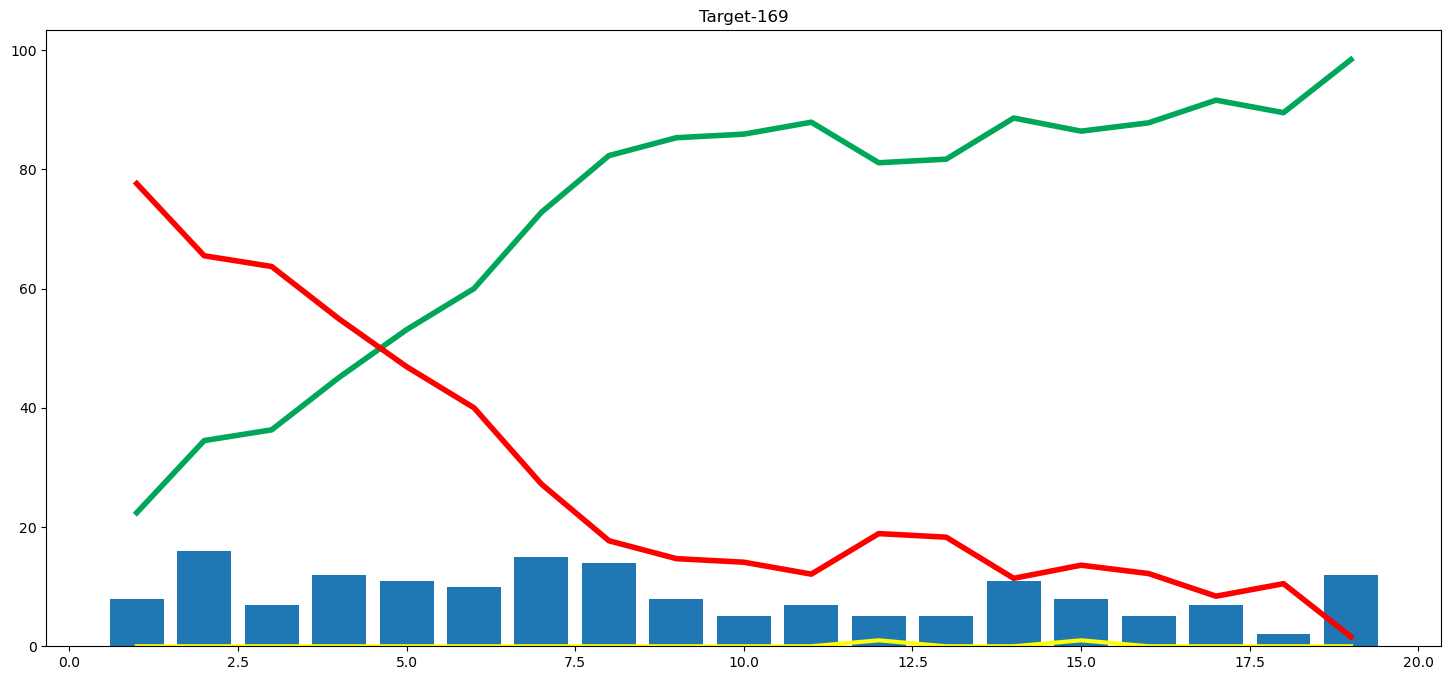

In [264]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [253]:
team

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Punjab Kings',
 'Kolkata Knight Riders',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [265]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati'], dtype=object)

In [266]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))